# Uppgift: Pretrained Models

## Del A: Prediktera Egna Bilder

In [2]:
# Import av nödvändiga bibliotek
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
# Ladda förtränad ResNet50 modell
model = ResNet50(weights='imagenet')
print("Modell laddad!")

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Modell laddad!


In [4]:
# Funktion för att prediktera en bild
def predict_image(img_path, top_predictions=3):
    """
    Predikterar klassificering för en bild.
    
    Args:
        img_path: Sökväg till bildfilen
        top_predictions: Antal top prediktioner att visa
    
    Returns:
        Lista med prediktioner (class, description, probability)
    """
    # Ladda och visa bilden
    img = image.load_img(img_path, target_size=(224, 224))
    
    # Konvertera till array
    x = image.img_to_array(img)
    
    # Lägg till batch dimension
    x = np.expand_dims(x, axis=0)
    
    # Preprocessa bilden
    x = preprocess_input(x)
    
    # Prediktera
    preds = model.predict(x)
    
    # Dekoda resultatet
    predictions = decode_predictions(preds, top=top_predictions)[0]
    
    return img, predictions

In [5]:
# Funktion för att visa bild med prediktioner
def display_prediction(img_path):
    """
    Visar bild tillsammans med dess prediktioner.
    """
    img, predictions = predict_image(img_path)
    
    # Visa bild
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Input Bild')
    
    # Visa prediktioner
    plt.subplot(1, 2, 2)
    labels = [pred[1].replace('_', ' ') for pred in predictions]
    probabilities = [pred[2] * 100 for pred in predictions]
    
    plt.barh(labels, probabilities)
    plt.xlabel('Sannolikhet (%)')
    plt.title('Top 3 Prediktioner')
    plt.xlim(0, 100)
    plt.tight_layout()
    plt.show()
    
    # Skriv ut prediktioner
    print("\nPrediktioner:")
    for i, (class_id, class_name, probability) in enumerate(predictions, 1):
        print(f"{i}. {class_name.replace('_', ' ')}: {probability*100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 498ms/step


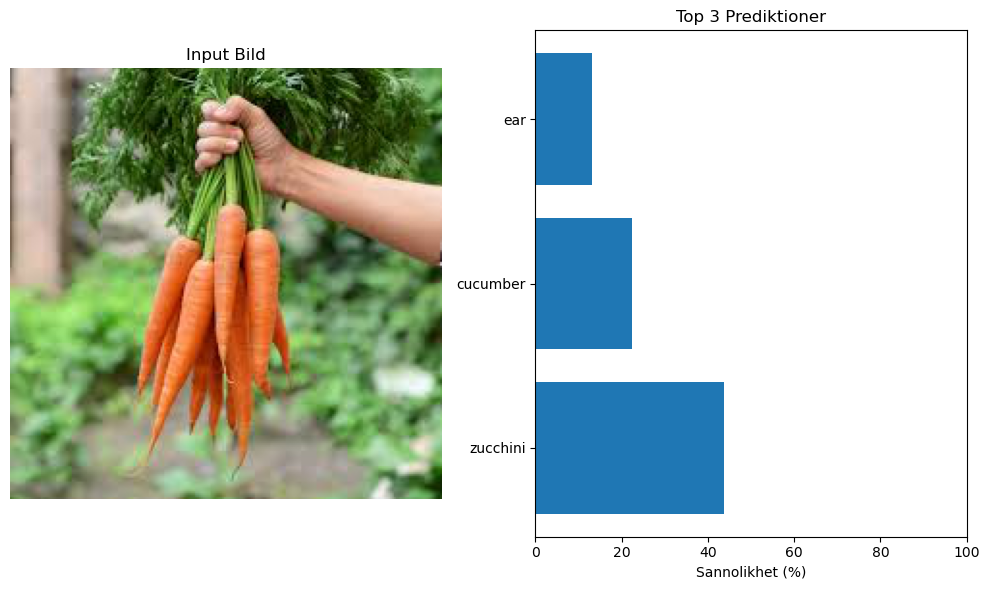


Prediktioner:
1. zucchini: 43.72%
2. cucumber: 22.32%
3. ear: 13.13%


In [8]:
# Exempel 1: Byt ut 'min_bild1.jpg' till din egen bild
display_prediction('min_bild1.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step


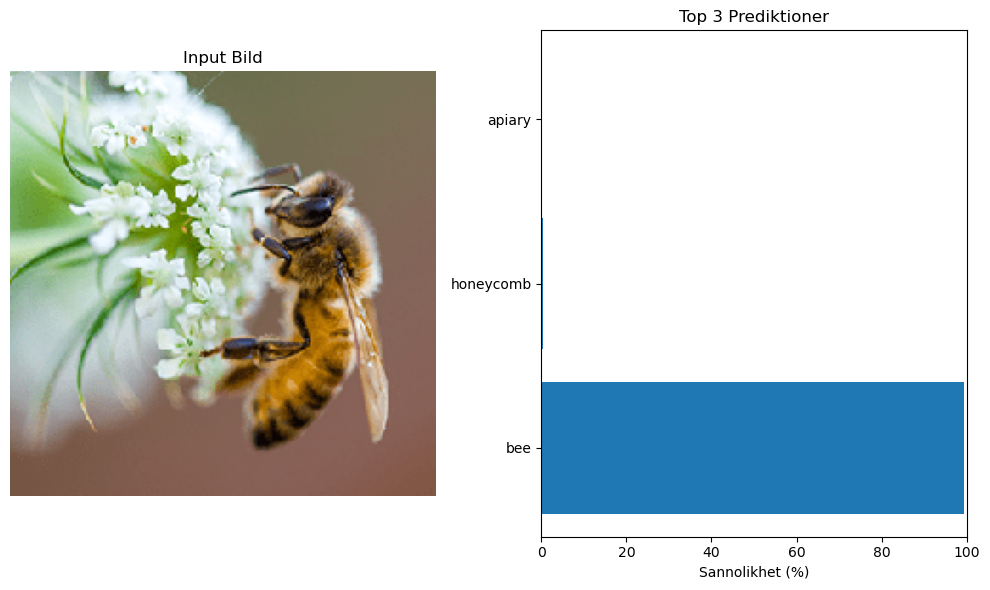


Prediktioner:
1. bee: 99.43%
2. honeycomb: 0.32%
3. apiary: 0.18%


In [11]:
# Exempel 2: Byt ut 'min_bild2.jpg' till din egen bild
display_prediction('min_bild2.jpg')

# DEL B: Streamlit Application

### Köra Streamlit applikationen
```bash
streamlit run image_classifier_app.py
```

Besvara följande frågor:
1. **Hur väl fungerade modellen på dina egna bilder?**

Dem fungerade helt okej. Testade med olika bilder och den predikterade dem så bra som det går. Vissa blev konstiga pga finns inte med i dataseten.

2. **Vilka styrkor och svagheter har förtränade modeller?**

**Styrkor:**
- Sparar enormt mycket tid och beräkningskraft - behöver inte träna från scratch
- Redan lärt sig användbara features och patterns från miljontals bilder
- Fungerar bra även med små dataset genom transfer learning
- Högkvalitativa modeller tränade av experter med stora resurser
- Kan användas direkt för vanliga klasser (ImageNet's 1000 klasser)
- Möjliggör snabb prototyping och utveckling av AI-applikationer

**Svagheter:**
- Begränsad till de klasser modellen är tränad på (t.ex. ImageNet's 1000 klasser)
- Kan ha bias från träningsdatan
- Stora modellfiler som kräver mycket minne
- Presterar sämre på bilder som ser väldigt annorlunda ut från träningsdatan
- Svårt att anpassa för mycket specifika eller ovanliga användningsfall
- Kan vara "overkill" för enkla uppgifter

3. **Varför är "Pretrained models" ett kraftfullt koncept?**

Pretrained models är kraftfullt av flera anledningar:
- **Demokratiserar AI:** Vem som helst kan använda state-of-the-art modeller utan att behöva miljontals bilder eller kraftfulla GPU:er för träning
- **Transfer Learning:** Kunskapen som modellen lärt sig kan överföras till nya problem - lågre lagren kan känna igen kanter, texturer och former som är användbara för många olika uppgifter
- **Tidsbesparing:** Istället för veckor/månader av träning kan man komma igång på minuter
- **Kostnadsbesparing:** Träning av stora modeller kostar enorma summor i beräkningskraft och elektricitet
- **Utgångspunkt för anpassning:** Kan fine-tunas för specifika domäner med relativt lite data
- **Bevisat resultat:** Modellerna har redan optimerats och validerats på stora dataset
- **Forskning och utveckling:** Låter utvecklare fokusera på applikationen istället för själva modellträningen

Detta gör avancerad AI-teknik tillgänglig för alla och accelererar innovation inom området.

4. **Vilka utmaningar stötte du på när du byggde applikationen?**

Hade inga problem när jag byggde applikationen förutom att vissa bilder inte gick att få en hög % på pga dem inte fanns i datasetet.